# RBM-GG 

Gaussian - Gaussian

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

In [2]:
data_dir = '../../../paperstudy/RBM/datas/'

In [3]:
sys.path.append('../')
import RBM as rbm

## Load data

In [4]:
model = rbm.test.GGRBM
mnist_train_data = data_dir + "mnist_train.csv"
mnist_test_data = data_dir + "mnist_test.csv"

training_data_file = open(mnist_train_data, 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

test_data_file = open(mnist_test_data, 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [5]:
# number of data
print('number of training data', len(training_data_list))
print('number of test data', len(test_data_list))

number of training data 60000
number of test data 10000


## Preprocessing

In [6]:
n_data_train = 5000
n_data_val = 500
n_data_test = 500

n_x = 784 # input vector size

x_train = np.zeros((n_data_train, n_x))
for i, data in enumerate(training_data_list[:n_data_train]):
    data = data.split(',')
    x_train[i] = np.asfarray(data[1:])/255.
    
x_val = np.zeros((n_data_val, n_x))
for i, data in enumerate(training_data_list[n_data_train:n_data_train+n_data_val]):
    data = data.split(',')
    x_val[i] = np.asfarray(data[1:])/255.
    
x_test = np.zeros((n_data_test, n_x))
for i, data in enumerate(test_data_list[:n_data_test]):
    data = data.split(',')
    x_test[i] = np.asfarray(data[1:])/255.

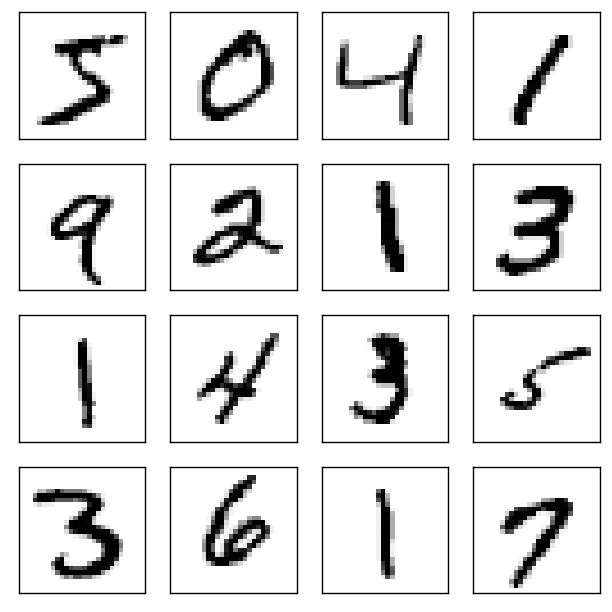

In [7]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

## Define RBM

In [17]:
model = rbm.test.GGRBM(n_x, 10, 0.1, 0.1)

In [ ]:
model.fit(x_train,0.01,1000) # fixed sig

0 0.12156005000445347
1 0.12154103476699492
2 0.12157060866314483
3 0.12148681755359955
4 0.12144158816599682
5 0.1214224409239914
6 0.12147392267682942
7 0.12148659924049728
8 0.1214876032011389
9 0.12147983225103627
10 0.12145922841176375
11 0.12145452115458692
12 0.12144211715336276
13 0.12139716055784022
14 0.12141047577310962
15 0.12138051295590381
16 0.12143056580206152
17 0.12137899663817593
18 0.12135945594522946
19 0.12134467784476966
20 0.12137379136129675
21 0.12132046504704126
22 0.12131705221563503
23 0.12134096186166657
24 0.121344160630893
25 0.12139208743851707
26 0.12136243910027919
27 0.12131772472408613
28 0.12137213266443596
29 0.12124871668573346
30 0.12128473869120715
31 0.12128794960073694
32 0.12128293877592605
33 0.12122809447327201
34 0.12119821007609308
35 0.12123479240704446
36 0.12120549578992511
37 0.12118540049671762
38 0.12119167474930244
39 0.12120613005918081
40 0.12117581525785055
41 0.12116155300368169
42 0.12114749854698988
43 0.12114749672646866
44

348 0.11817947182215773
349 0.11810708526944311
350 0.11811283922283766
351 0.11814781011252583
352 0.11815480853239829
353 0.11810123597507566
354 0.11812358490496071
355 0.11809052716963499
356 0.11808761283416973
357 0.1180407057541086
358 0.11806872121773108
359 0.11808166738381433
360 0.1181154459246858
361 0.11800858221602736
362 0.11799723345443315
363 0.11804721404987391
364 0.1179481310951763
365 0.11794842652122978
366 0.11792756385300204
367 0.11797216701524872
368 0.117917192268948
369 0.11791756207343276
370 0.11792253015586518
371 0.11791909332497628
372 0.11789922958163869
373 0.11785378551151056
374 0.11786968347853959
375 0.11788504781676509
376 0.11782506099242807
377 0.11782261894835395
378 0.117814451470252
379 0.11780192649823153
380 0.11779832855204687
381 0.11777784586479041
382 0.11776865949477508
383 0.11771222126625487
384 0.11771654507457832
385 0.11773319402763553
386 0.11778330995898038
387 0.11770605977043906
388 0.11769037846273911
389 0.11764939695989349

In [ ]:
plt.plot(np.arange(len(model.history['loss'])),model.history['loss'])

In [ ]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [ ]:
pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
#         ax[i,j].imshow(pred[ind].reshape(28,28), vmin=-1, vmax=1, cmap='Greys')
        ax[i,j].imshow(pred[ind].reshape(28,28), cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [ ]:
hid[0]# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [ ]:
plt.plot(np.arange(len(model.history['sig_v'])),model.history['sig_v'])

In [ ]:
plt.plot(np.arange(len(model.history['sig_h'])),model.history['sig_h'])